In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
net_df = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\P3\EIA Data Sets\Sweden\Sweden_Type_of_Power_Net.csv")

In [3]:
net_df
sweden_net = net_df.T
sweden_net.columns = sweden_net.iloc[0]
final_net = sweden_net.drop(["type of power plants"])

In [4]:
final_net.rename(columns = {"type of power plants" : "year"})

type of power plants,sum of supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,gas-turbines for reserve and others,import
1986,135520,60134,-243,66884,3443,2807,0,0,617,43,1835
1987,143695,70950,-254,64341,3212,2761,0,0,446,65,2174
1988,146174,69015,-252,66274,2775,2871,0,0,377,50,5064
1989,150902,70914,-75,62687,2241,2813,0,0,200,70,12053
1990,154622,71676,-227,65225,2221,2582,0,0,204,31,12909
1991,148656,62499,-183,73484,3433,2905,0,0,292,50,6225
1992,150626,73524,-227,60774,4012,3087,0,0,524,84,8847
1993,149191,73809,-242,58761,4781,3533,52,0,389,131,7979
1994,145069,58375,-151,70086,5165,3832,75,0,872,136,6680
1995,151847,67247,-25,66978,5489,3844,105,0,401,89,7720


In [5]:
gross_df = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\P3\EIA Data Sets\Sweden\Sweden_Type_of_Power_Gross.csv")

In [6]:
gross_df.set_index("type of power plants")
sweden_gross = gross_df.T
sweden_gross.columns = sweden_gross.iloc[0]
final_gross = sweden_gross.drop(["type of power plants"])

In [7]:
# final_gross

In [8]:
Own_df = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\P3\EIA Data Sets\Sweden\Sweden_Type_of_Power_Own_Use.csv")

In [9]:
Own_df.set_index("type of power plants")
sweden_own = Own_df.T
sweden_own.columns = sweden_own.iloc[0]
final_own = sweden_own.drop(["type of power plants"])

In [10]:
# final_own

In [11]:
# final_own.astype('float64').dtypes
# final_net.astype('float64').dtypes
# final_gross.astype('float64').dtypes

In [12]:
final_own = final_own.reset_index().rename(columns={"index":"Year"})
final_net = final_net.reset_index().rename(columns={"index":"Year"})
final_gross = final_gross.reset_index().rename(columns={"index":"Year"})

In [13]:
final_own = final_own.rename(columns={"sum of supply": "total_supply"})
final_net = final_net.rename(columns={"sum of supply": "total_supply"})
final_gross = final_gross.rename(columns={"sum of supply": "total_supply"})

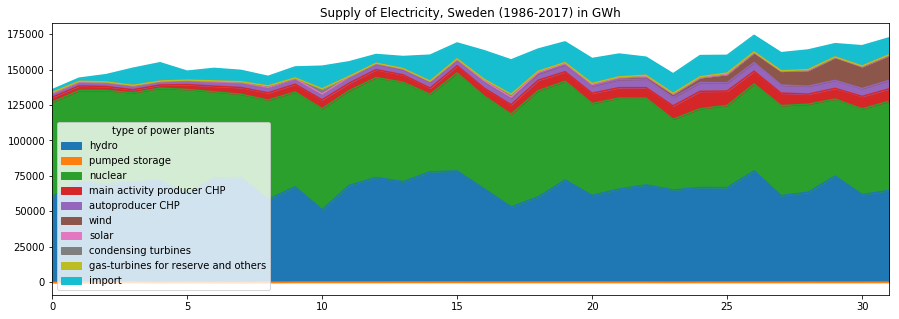

In [57]:
final_net.drop("total_supply", axis=1).plot.area(figsize = [15,5], title = "Supply of Electricity, Sweden (1986-2017) in GWh")
plt.savefig(r"C:\Users\wcarn\Desktop\GitHub\leaflet-challenge\Project-3-\assets\img\Sweden_total_production.png")
plt.show()

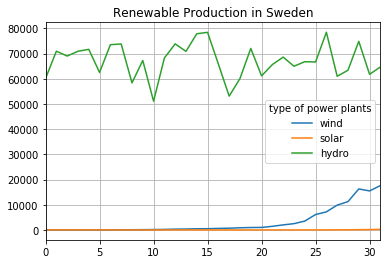

In [62]:
final_net[["wind", "solar", "hydro"]].plot(title = "Renewable Production in Sweden",grid=True)
plt.savefig(r"C:\Users\wcarn\Desktop\GitHub\leaflet-challenge\Project-3-\assets\img\Sweden_renewables_production.png")
plt.show()

In [16]:
new_df = final_gross.total_supply.values.reshape(-1, 1).astype("float64")
# new_df
n_df = final_gross.hydro.values.reshape(-1, 1).astype("float64")
# new_df

In [17]:
# final_net.to_csv("sweden_net.csv")
# final_gross.to_csv("sweden_gross.csv")
# final_own.to_csv("sweden_own.csv")

In [18]:
X = final_gross.drop("total_supply", axis=1)
y = new_df.astype("float64")
print(X.shape, y.shape)

(32, 11) (32, 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999993072644444
Testing Score: 0.9999985254626007


Text(0.5, 1.0, 'Residual Plot')

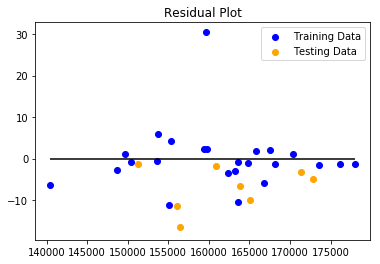

In [22]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

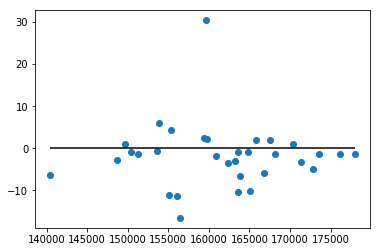

In [23]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [24]:
# predictions

In [25]:
# y

Shape:  (32, 1) (32, 1)
Weight coefficients:  [[0.34878042]]
y-axis intercept:  [137875.95751622]
Min X Value: [[51740.]]
Max X Value: [[79061.]]
True output: [140486.]
Predicted output: [159128.19502928]
Prediction Error: [18642.19502928]


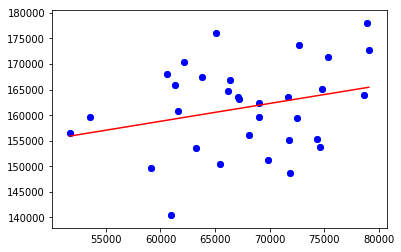

In [26]:
X = n_df.astype("float64")
y = new_df.astype("float64")

print("Shape: ", X.shape, y.shape)
X
plt.scatter(X, y)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [27]:
merge_df=final_gross.iloc[24:]

In [28]:
price_df = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\P3\EIA Data Sets\Sweden\sweden_electricty_price_10-18.csv")

In [29]:
price_df

,"Electricity prices for households in Sweden 2010-2018, annually",Unnamed: 1
0,Electricity prices for households in Sweden fr...,NaN
1,2010,18.99
2,2011,20.68
3,2012,20.55
4,2013,20.74
5,2014,19.17
6,2015,18.63
7,2016,19.28
8,2017,19.65
9,2018,19.41


In [30]:
price_df = price_df.drop([0])

In [31]:
price_df = price_df.rename(columns={"Electricity prices for households in Sweden 2010-2018, annually": "Year", "Unnamed: 1": "price"})

In [32]:
regress_df = merge_df.set_index('Year').join(price_df.set_index('Year'))

In [33]:
final_net

type of power plants,Year,total_supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,gas-turbines for reserve and others,import
0,1986,135520,60134,-243,66884,3443,2807,0,0,617,43,1835
1,1987,143695,70950,-254,64341,3212,2761,0,0,446,65,2174
2,1988,146174,69015,-252,66274,2775,2871,0,0,377,50,5064
3,1989,150902,70914,-75,62687,2241,2813,0,0,200,70,12053
4,1990,154622,71676,-227,65225,2221,2582,0,0,204,31,12909
5,1991,148656,62499,-183,73484,3433,2905,0,0,292,50,6225
6,1992,150626,73524,-227,60774,4012,3087,0,0,524,84,8847
7,1993,149191,73809,-242,58761,4781,3533,52,0,389,131,7979
8,1994,145069,58375,-151,70086,5165,3832,75,0,872,136,6680
9,1995,151847,67247,-25,66978,5489,3844,105,0,401,89,7720


In [34]:
X = regress_df.total_supply.values.reshape(-1, 1)
y = regress_df.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (8, 1) (8, 1)


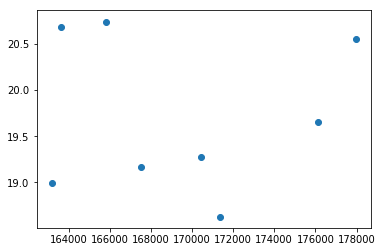

In [35]:
plt.scatter(X, y)

Weight coefficients:  [[2.29994644e-06]]
y-axis intercept:  [19.32138838]
Min X Value: [[163187]]
Max X Value: [[177982]]
True output: [18.99]
Predicted output: [19.69670974]
Prediction Error: [0.70670974]


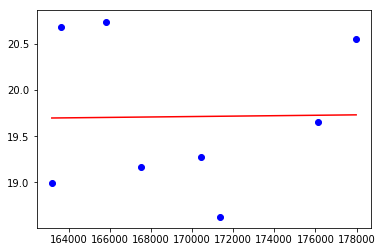

In [36]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [37]:
cons_df = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\P3\EIA Data Sets\Sweden\Sweden_Electricty_Consumption.csv")

In [38]:
cons_df
sweden_cons = cons_df.T
sweden_cons.columns = sweden_cons.iloc[0]

In [39]:
sweden_cons = sweden_cons.reset_index().rename(columns={"index":"Year"}).drop([0])
sweden_cons

Unnamed: 0,Year,Total electricity consumption,Export,Crop and animal production- with consumption exceeding 20 000 kWh,Crop and animal production -with consumption up to 20 000 kWh,"Manufacturing industry, mining and quarrying","Electricity supply (offices, warehouses etc.)",Gas production; distribution of gaseous fuels through mains and pipeline networks,"Heating and cooling supply, Electricity supply (offices, warehouses etc.)","Heating and cooling supply, Gas supply (manuf./distr. of gas-works gas and natural gas)",...,Public administration and military defence,Education,Human health activities,Activities of membership organisations,"Creative, arts and entertainment activities",-one- or two family houses with consumption exceeding 10 000 kWh,-one- or two family houses with consumption up to 10 000 kWh,"-multi family houses, direct delivery, with consumption exceeding 5 000 kWh","-multi family houses, direct delivery, with consumtion up to 5 000 kWh",Second homes
1,2008,158716,14716,1644,1004,56625,113,76,1906,1721,...,1077,2590,3353,1054,1516,20024,5144,1131,4347,2320
2,2009,146971,9085,2072,973,50657,131,131,1983,1634,...,1004,2548,2789,855,1974,20363,4498,1396,4203,2998
3,2010,159844,12853,2289,895,53359,165,93,2007,1603,...,1147,2579,2939,1141,1818,23080,4700,1461,4276,3263
4,2011,160009,19714,1996,997,53843,208,90,2063,1333,...,1407,2367,2689,823,1402,19529,4789,1737,4321,2749
5,2012,174124,31254,2184,966,52981,197,123,2094,1793,...,1479,2290,2590,857,1427,20719,4919,1598,4219,3043
6,2013,161872,22676,2143,966,50935,205,110,2001,1459,...,1438,2173,2637,793,1419,20357,4805,1584,4180,2964
7,2014,163808,29475,2029,969,49552,162,118,1940,1804,...,1416,2088,2532,743,1376,18931,4805,1363,4193,2851
8,2015,168230,31894,2170,979,48784,214,129,1910,1474,...,1390,2151,2534,816,1373,19975,4722,1385,4210,3047
9,2016,166786,26022,2215,1012,49506,222,168,2088,1443,...,1451,2073,2606,793,1387,21210,4596,1436,4195,3212
10,2017,172377,30888,2028,832,49063,174,114,2172,1544,...,1611,2120,2634,906,1418,22563,4386,1098,4140,3040


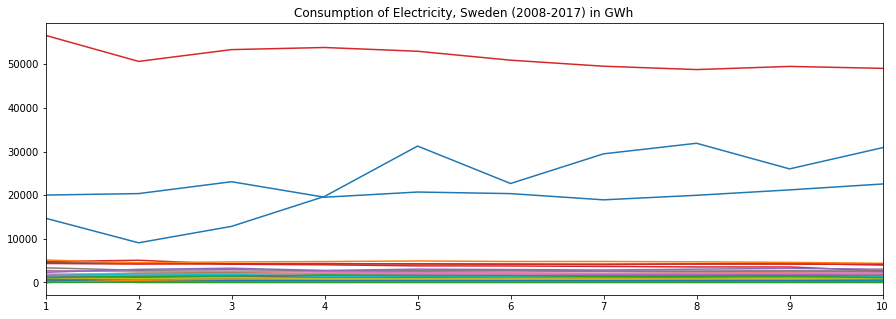

In [40]:
sweden_cons.drop("Total electricity consumption", axis=1).plot.line(figsize = [15,5], legend = False, title = "Consumption of Electricity, Sweden (2008-2017) in GWh")
plt.show()

In [41]:
US_gen = pd.read_csv(r"C:\Users\wcarn\Desktop\GitHub\leaflet-challenge\Project-3-\Sweden\Net_generation_for_all_sectors_US.csv")

In [42]:
US_gen.set_index("Net generation for all sectors")
US_gen = US_gen.T
US_gen.columns = US_gen.iloc[0]

In [43]:
US_gen = US_gen.reset_index().rename(columns={"index":"Year"}).drop([0])

In [44]:
US_gen = US_gen.iloc[7:17]

In [45]:
US_gen

Net generation for all sectors,Year,United States : all fuels (utility-scale),United States : coal,United States : petroleum liquids,United States : petroleum coke,United States : natural gas,United States : other gases,United States : nuclear,United States : conventional hydroelectric,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : biomass,United States : wood and wood-derived fuels,United States : other biomass,United States : hydro-electric pumped storage,United States : other,United States : all solar,United States : small-scale solar photovoltaic,United States : all utility-scale solar
8,2008,4119388,1985801,31917,14325,882981,11707,806208,254831,55363,864,14840,55034,37300,17734,-6288,11804,0,0,864
9,2009,3950331,1755904,25972,12964,920979,10632,798855,273445,73886,891,15009,54493,36050,18443,-4627,11928,0,0,891
10,2010,4125060,1847290,23337,13724,987697,11313,806968,260203,94652,1212,15219,56089,37172,18917,-5501,12855,0,0,1212
11,2011,4100141,1733430,16086,14096,1013689,11566,790204,319355,120177,1818,15316,56671,37449,19222,-6421,14154,0,0,1818
12,2012,4047765,1514043,13403,9787,1225894,11898,769331,276240,140822,4327,15562,57622,37799,19823,-4950,13787,0,0,4327
13,2013,4065964,1581115,13820,13344,1124836,12853,789016,268565,167840,9036,15775,60858,40028,20830,-4681,13588,0,0,9036
14,2014,4093606,1581710,18276,11955,1126609,12022,797166,259367,181655,17691,15877,63989,42340,21650,-6174,13461,28924,11233,17691
15,2015,4077601,1352398,17372,10877,1333482,13117,797178,249080,190719,24893,15918,63632,41929,21703,-5091,14028,39032,14139,24893
16,2016,4076675,1239149,13008,11197,1378307,12807,805694,267812,226993,36054,15826,62760,40947,21813,-6686,13754,54866,18812,36054
17,2017,4034271,1205835,12414,8976,1296415,12469,804950,300333,254303,53286,15927,62762,41152,21610,-6495,13096,77276,23990,53286


In [46]:
merge_net = final_net.iloc[22:]

In [47]:
merge_df = pd.merge(merge_net, US_gen, on='Year', how='outer')

In [48]:
merge_df

,Year,total_supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,...,United States : all utility-scale solar,United States : geothermal,United States : biomass,United States : wood and wood-derived fuels,United States : other biomass,United States : hydro-electric pumped storage,United States : other,United States : all solar,United States : small-scale solar photovoltaic,United States : all utility-scale solar
0,2008,158715,68595,-46,61266,7402,6063,1996,0,666,...,864,14840,55034,37300,17734,-6288,11804,0,0,864
1,2009,146971,64973,-84,49987,9484,5894,2485,0,444,...,891,15009,54493,36050,18443,-4627,11928,0,0,891
2,2010,159844,66773,-44,55626,12276,6242,3502,0,517,...,1212,15219,56089,37172,18917,-5501,12855,0,0,1212
3,2011,160009,66661,-52,58026,10180,5790,6101,13,801,...,1818,15316,56671,37449,19222,-6421,14154,0,0,1818
4,2012,174124,78466,-54,61393,9015,6111,7165,19,318,...,4327,15562,57622,37799,19823,-4950,13787,0,0,4327
5,2013,161872,60993,-58,63597,8839,5640,9842,35,300,...,9036,15775,60858,40028,20830,-4681,13588,0,0,9036
6,2014,163808,63380,-46,62185,7151,5583,11234,47,411,...,17691,15877,63989,42340,21650,-6174,13461,28924,11233,17691
7,2015,168230,74861,-55,54347,7568,5613,16268,97,227,...,24893,15918,63632,41929,21703,-5091,14028,39032,14139,24893
8,2016,166786,61764,-51,60542,8803,5527,15479,143,278,...,36054,15826,62760,40947,21813,-6686,13754,54866,18812,36054
9,2017,172377,64676,-44,63008,8703,5986,17609,230,307,...,53286,15927,62762,41152,21610,-6495,13096,77276,23990,53286


In [49]:
total_prod = merge_df
list(merge_df.columns)

['Year',
 'total_supply',
 'hydro',
 'pumped storage',
 'nuclear',
 'main activity producer CHP',
 'autoproducer CHP',
 'wind',
 'solar',
 'condensing turbines',
 'gas-turbines for reserve and others',
 'import',
 'United States : all fuels (utility-scale)',
 'United States : coal',
 'United States : petroleum liquids',
 'United States : petroleum coke',
 'United States : natural gas',
 'United States : other gases',
 'United States : nuclear',
 'United States : conventional hydroelectric',
 'United States : wind',
 'United States : all utility-scale solar',
 'United States : geothermal',
 'United States : biomass',
 'United States : wood and wood-derived fuels',
 'United States : other biomass',
 'United States : hydro-electric pumped storage',
 'United States : other',
 'United States : all solar',
 'United States : small-scale solar photovoltaic',
 'United States : all utility-scale solar']

In [50]:
total_prod["US total renewables"] = merge_df['United States : conventional hydroelectric'] + merge_df['United States : wind'] + merge_df['United States : all solar']
total_prod["Sweden total renewables"] = merge_df['hydro'] + merge_df['wind'] + merge_df['solar']

In [51]:
total_prod

,Year,total_supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,...,United States : biomass,United States : wood and wood-derived fuels,United States : other biomass,United States : hydro-electric pumped storage,United States : other,United States : all solar,United States : small-scale solar photovoltaic,United States : all utility-scale solar,US total renewables,Sweden total renewables
0,2008,158715,68595,-46,61266,7402,6063,1996,0,666,...,55034,37300,17734,-6288,11804,0,0,864,310194,70591
1,2009,146971,64973,-84,49987,9484,5894,2485,0,444,...,54493,36050,18443,-4627,11928,0,0,891,347331,67458
2,2010,159844,66773,-44,55626,12276,6242,3502,0,517,...,56089,37172,18917,-5501,12855,0,0,1212,354855,70275
3,2011,160009,66661,-52,58026,10180,5790,6101,13,801,...,56671,37449,19222,-6421,14154,0,0,1818,439532,72775
4,2012,174124,78466,-54,61393,9015,6111,7165,19,318,...,57622,37799,19823,-4950,13787,0,0,4327,417062,85650
5,2013,161872,60993,-58,63597,8839,5640,9842,35,300,...,60858,40028,20830,-4681,13588,0,0,9036,436405,70870
6,2014,163808,63380,-46,62185,7151,5583,11234,47,411,...,63989,42340,21650,-6174,13461,28924,11233,17691,469946,74661
7,2015,168230,74861,-55,54347,7568,5613,16268,97,227,...,63632,41929,21703,-5091,14028,39032,14139,24893,478831,91226
8,2016,166786,61764,-51,60542,8803,5527,15479,143,278,...,62760,40947,21813,-6686,13754,54866,18812,36054,549671,77386
9,2017,172377,64676,-44,63008,8703,5986,17609,230,307,...,62762,41152,21610,-6495,13096,77276,23990,53286,631912,82515


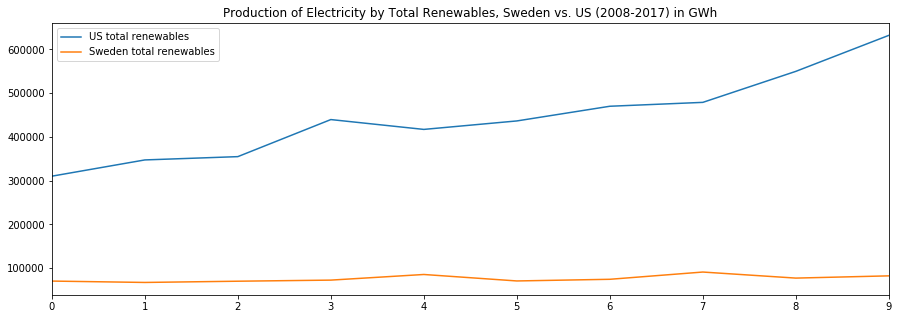

In [55]:
total_prod[["US total renewables", "Sweden total renewables"]].astype('int64').plot.line(figsize = [15,5], title = "Production of Electricity by Total Renewables, Sweden vs. US (2008-2017) in GWh")
plt.savefig(r"C:\Users\wcarn\Desktop\GitHub\leaflet-challenge\Project-3-\assets\img\Production_of_Electricity.png")
plt.show()

In [ ]:
merge_df[['United States : all solar','United States : wind','United States : conventional hydroelectric']]

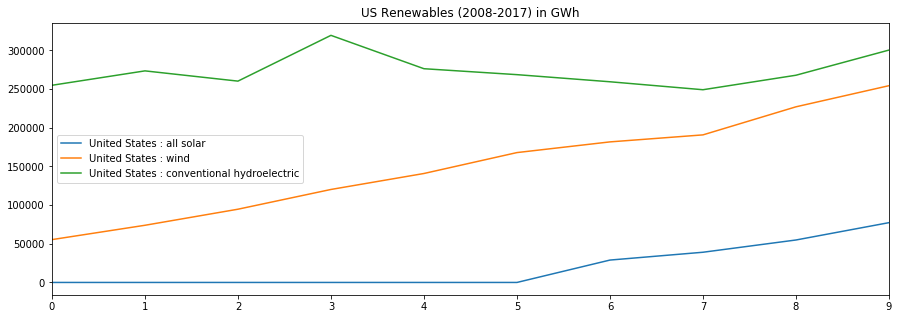

In [64]:
merge_df[['United States : all solar','United States : wind','United States : conventional hydroelectric']].plot.line(figsize = [15,5], title = "US Renewables (2008-2017) in GWh")
plt.savefig(r"C:\Users\wcarn\Desktop\GitHub\leaflet-challenge\Project-3-\assets\img\US_Production_of_Electricity_Renew.png")
plt.show()

In [ ]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)